In [20]:
import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import matplotlib.ticker as ticker
import matplotlib.collections as clt
#import PtitPrince as pt

birth_rates_df = pd.read_csv("../data/us_births_2016_2021.csv")
new_df = pd.read_csv('../data/Natality, 2007-2021.txt',header=0,delimiter="\t")

In [21]:
new_df1 = new_df.drop(columns=['Notes', 'Year Code', 'State Code'])

In [22]:
birth_rates_df

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
...,...,...,...,...,...,...,...,...,...
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0


In [23]:
df1 = new_df1.drop(columns=['State', 'Average Birth Weight', 'Tobacco Use', 'Tobacco Use Code', 'Diabetes', 'Diabetes Code', '% of Total Births', 'Marital Status Code', 'Diabetes']).reset_index()
df1_cleaned = df1.groupby(['Year', 'Marital Status']).agg({"Births":'sum', 'Average Age of Mother':'median'}).reset_index()
#z4_cleaned= z4_cleaned.sort_values('Education Level Code', ascending=True)
df1_totalbirths = df1_cleaned.groupby('Year')['Births'].sum()


In [24]:
def plot_state(state):
    states_only = new_df.drop(columns=['Notes', 'State Code', 'Year Code', 'Average Birth Weight', 'Tobacco Use', 'Tobacco Use Code', 'Diabetes', 'Diabetes Code', '% of Total Births', 'Marital Status Code', 'Diabetes', 'Average Age of Mother', 'Marital Status'])
    states_only = states_only.groupby(['Year', 'State']).sum('Births').reset_index()
    state_df = states_only[states_only['State'] == state]
    
    return sns.lineplot(state_df, x = "Year", y = "Births")

In [25]:

states_only = new_df.drop(columns=['Notes', 'State Code', 'Year Code', 'Average Birth Weight', 'Tobacco Use', 'Tobacco Use Code', 'Diabetes', 'Diabetes Code', '% of Total Births', 'Marital Status Code', 'Diabetes', 'Average Age of Mother', 'Marital Status'])
states_only = states_only.groupby(['Year', 'State']).sum('Births').reset_index()
al = states_only[states_only['State'] == "Alabama"]
states_only.sort_values(by='Births', ascending=False)

,Year,State,Births
4,2007,California,566403
55,2008,California,551763
106,2009,California,527015
157,2010,California,510195
259,2012,California,503751
...,...,...,...
555,2017,Vermont,5649
606,2018,Vermont,5423
759,2021,Vermont,5367
657,2019,Vermont,5355


<Axes: xlabel='Year', ylabel='Births'>

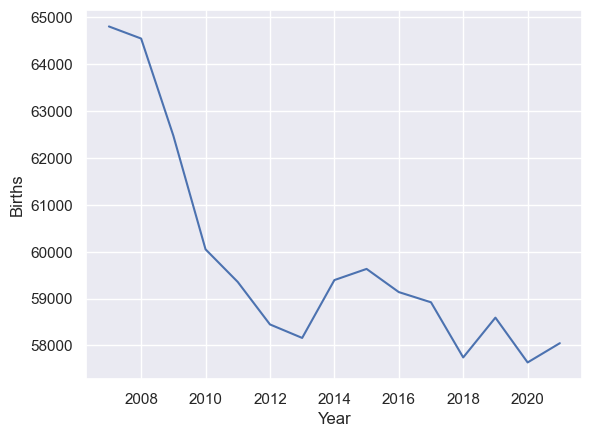

In [26]:


sns.lineplot(al, x = "Year", y = "Births")

<Axes: xlabel='Year', ylabel='Births'>

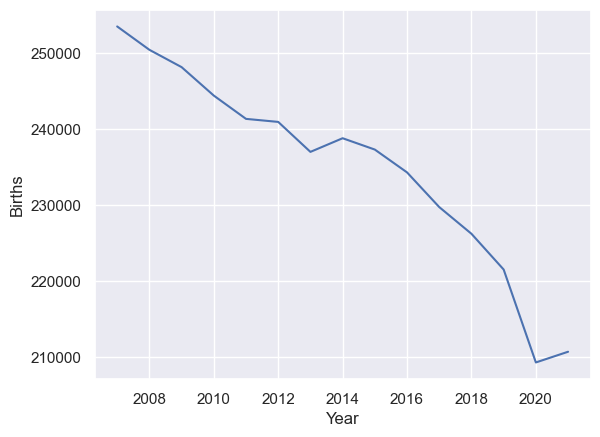

In [27]:
plot_state('New York')


<Axes: xlabel='Year', ylabel='Births'>

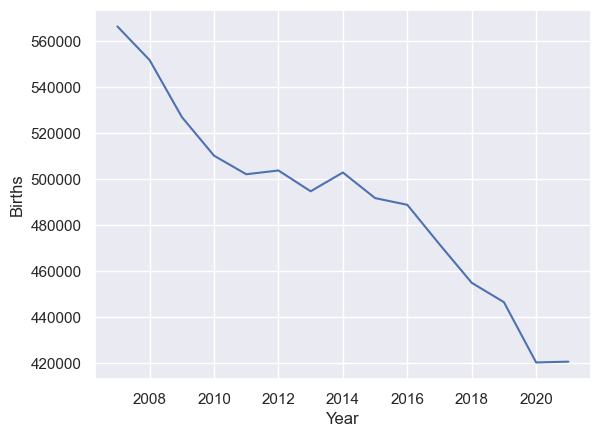

In [28]:
plot_state('California')

<Axes: xlabel='Year', ylabel='Births'>

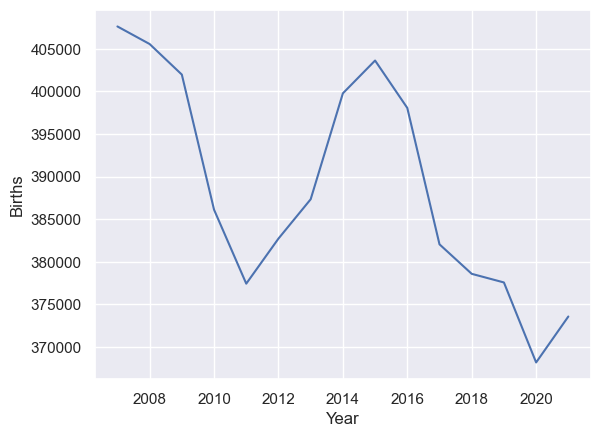

In [29]:
plot_state('Texas')

<Axes: xlabel='Year', ylabel='Births'>

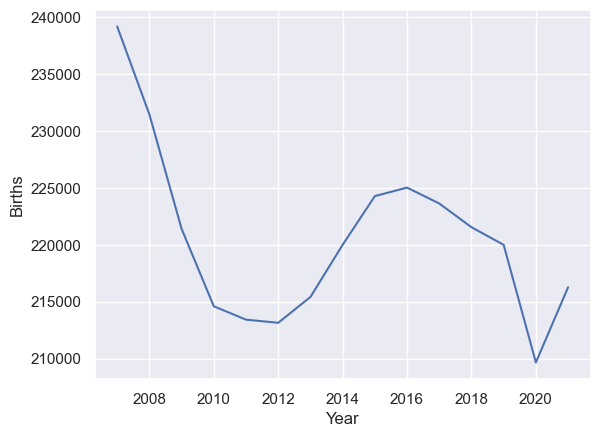

In [30]:
plot_state('Florida')

In [31]:
df2 = new_df1.drop(columns=['State', 'Tobacco Use', 'Tobacco Use Code', 'Diabetes Code', 'Marital Status Code', 'Marital Status', '% of Total Births','Average Birth Weight']).reset_index()
df2_diabetes = df2.groupby(['Year', 'Diabetes']).agg({"Births":'sum', 'Average Age of Mother':'median'}).reset_index()

Text(0.5, 1.0, 'Number of U.S. Births by Cases of Diabetes\n2008-2021')

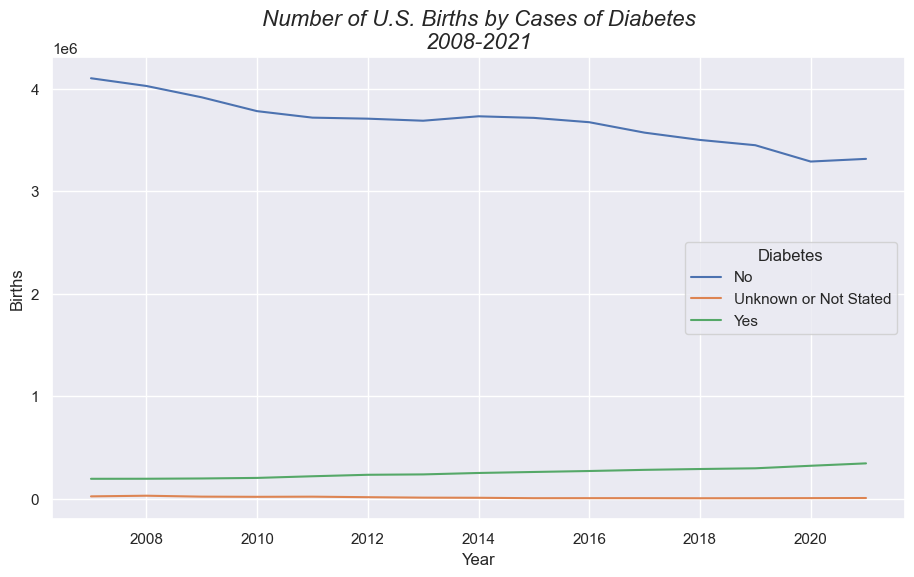

In [32]:
sns.set_theme()

f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(df2_diabetes, x = 'Year', y= 'Births', hue='Diabetes')

ax.set_title("Number of U.S. Births by Cases of Diabetes\n2008-2021", style= 'italic', fontsize=16)

In [33]:
df3 = new_df1.drop(columns=['State', 'Diabetes', 'Tobacco Use Code', 'Diabetes Code', 'Marital Status Code', 'Marital Status', '% of Total Births','Average Birth Weight']).reset_index()
df3_tobacco = df3.groupby(['Year', 'Tobacco Use']).agg({"Births":'sum', 'Average Age of Mother':'median'}).reset_index()

Text(0.5, 1.0, 'Number of U.S. Births by Tobacco Use\n2008-2021')

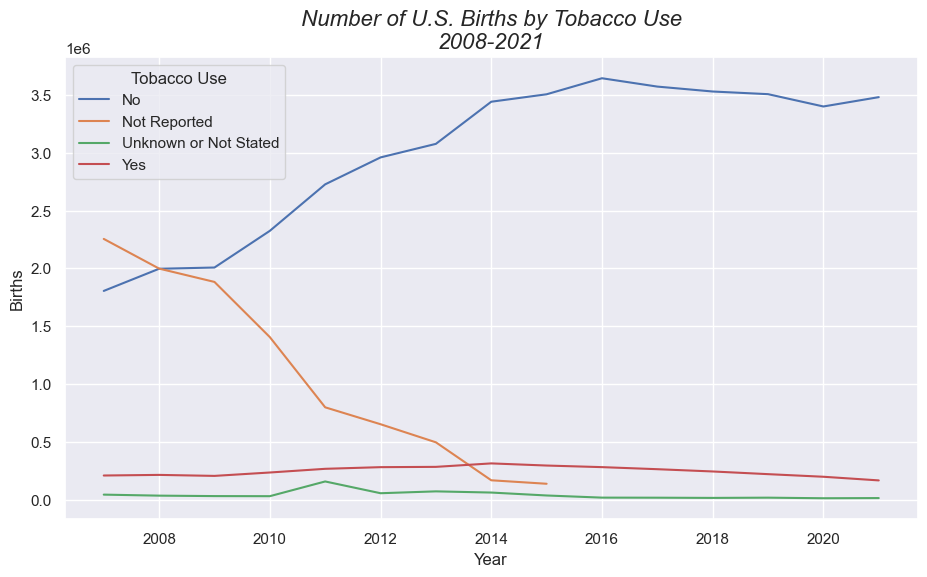

In [34]:
sns.set_theme()

f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(df3_tobacco, x = 'Year', y= 'Births', hue='Tobacco Use')
ax.set_title("Number of U.S. Births by Tobacco Use\n2008-2021", style= 'italic', fontsize=16)

Text(0, 0.5, 'Births in Millions')

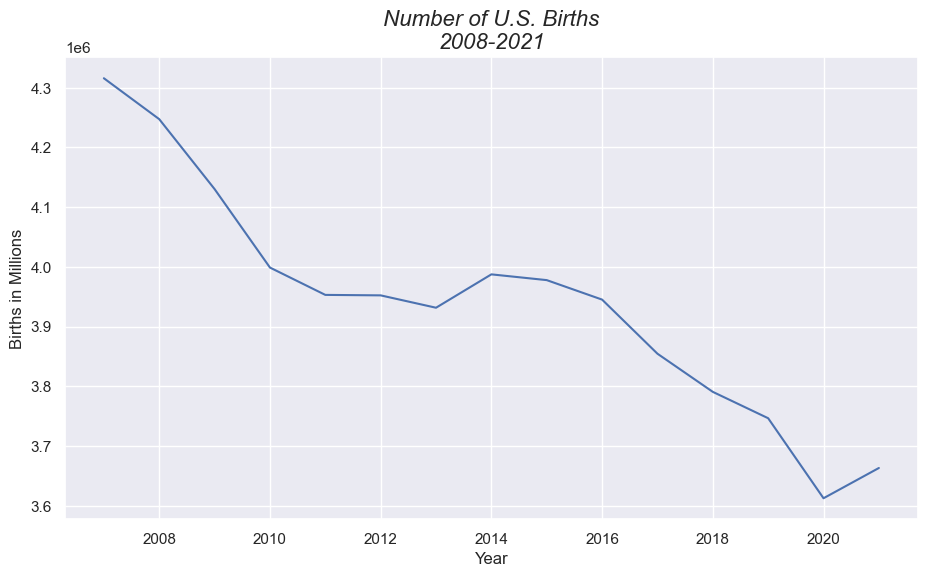

In [35]:
sns.set_theme()

f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(df1_totalbirths)
ax.set_title("Number of U.S. Births\n2008-2021", style= 'italic', fontsize=16)
ax.set_ylabel('Births in Millions')

In [36]:
last_years = df1_cleaned[df1_cleaned['Year'] >= 2019]


Text(0, 0.5, 'Births in Millions')

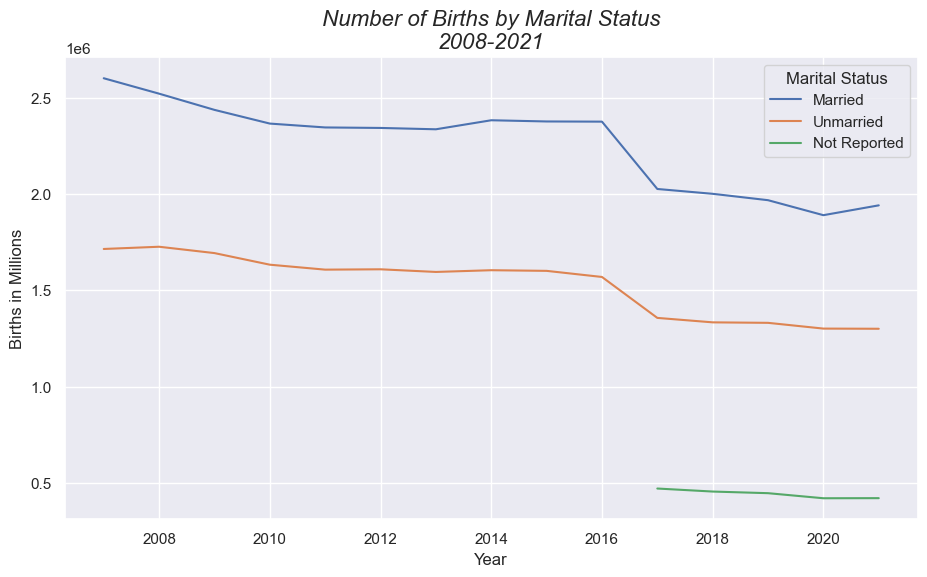

In [37]:

sns.set_theme()

f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(df1_cleaned, x = 'Year', y= 'Births', hue='Marital Status')
#ax.xaxis.set_ticks(np.arange(2019, 2022, 1))
#ax.yaxis.set_ticks(np.arange(0.4, 2.0))
ax.set_title("Number of Births by Marital Status\n2008-2021", style= 'italic', fontsize=16)
ax.set_ylabel('Births in Millions')

In [38]:
z4 = birth_rates_df.drop(columns=["Gender", 'State', 'Average Birth Weight (g)', 'State Abbreviation']).reset_index()
z4_cleaned = z4.groupby(['Year', 'Education Level of Mother', 'Education Level Code']).agg({"Number of Births":'sum', 'Average Age of Mother (years)':'mean'}).reset_index()
z4_cleaned= z4_cleaned.sort_values('Education Level Code', ascending=True)

In [39]:
w_gender = birth_rates_df.drop(columns=['State', 'Average Birth Weight (g)', 'State Abbreviation']).reset_index()
w_gender_cleaned = w_gender.groupby(['Year','Gender', 'Education Level of Mother', 'Education Level Code']).agg({"Number of Births":'sum', 'Average Age of Mother (years)':'mean'}).reset_index()

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_10154/1268178422.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);


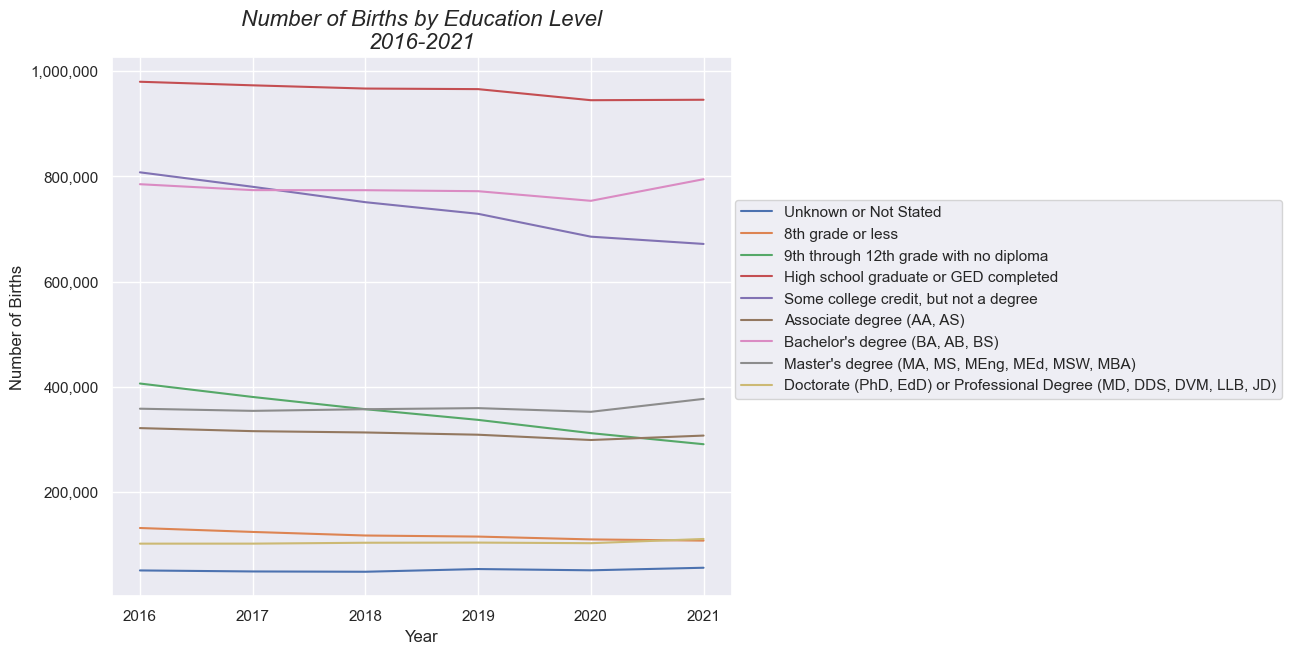

In [40]:
sns.set_theme()

f, ax = plt.subplots()
sns.lineplot(z4_cleaned,x= 'Year', y= 'Number of Births', hue="Education Level of Mother")
ax.set_title("Number of Births by Education Level\n2016-2021", style= 'italic', fontsize=16)
f.set_size_inches(8, 7)
pos = ax.get_position()
ax.legend(loc='upper right', bbox_to_anchor=(1.90, .75))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

In [41]:
z2 = birth_rates_df.drop(columns=["Gender", 'Education Level of Mother', 'State', "State Abbreviation"]).groupby('Year').sum().reset_index()

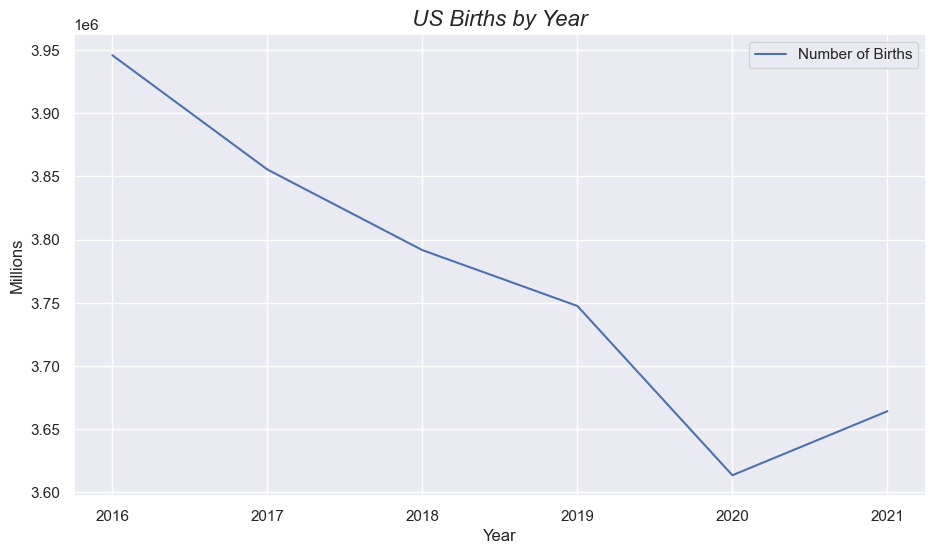

In [42]:
f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(z2,x= 'Year', y= 'Number of Births', label='Number of Births')
ax.set_title("US Births by Year", style= 'italic', fontsize=16)
ax.set_ylabel('Millions')
ax.legend().set_visible(True)

#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in current_values]);

In [43]:
w_gender = birth_rates_df.drop(columns=['State', 'Average Birth Weight (g)', 'State Abbreviation']).reset_index()
w_gender_cleaned = w_gender.groupby(['Year','Gender', 'Education Level of Mother', 'Education Level Code']).agg({"Number of Births":'sum', 'Average Age of Mother (years)':'mean'}).reset_index()
new_gender_cleaned= w_gender_cleaned.drop(columns=['Education Level Code', 'Average Age of Mother (years)', 'Education Level of Mother'])
new_gender_cleaned = new_gender_cleaned.groupby(['Year', 'Gender']).sum().reset_index()

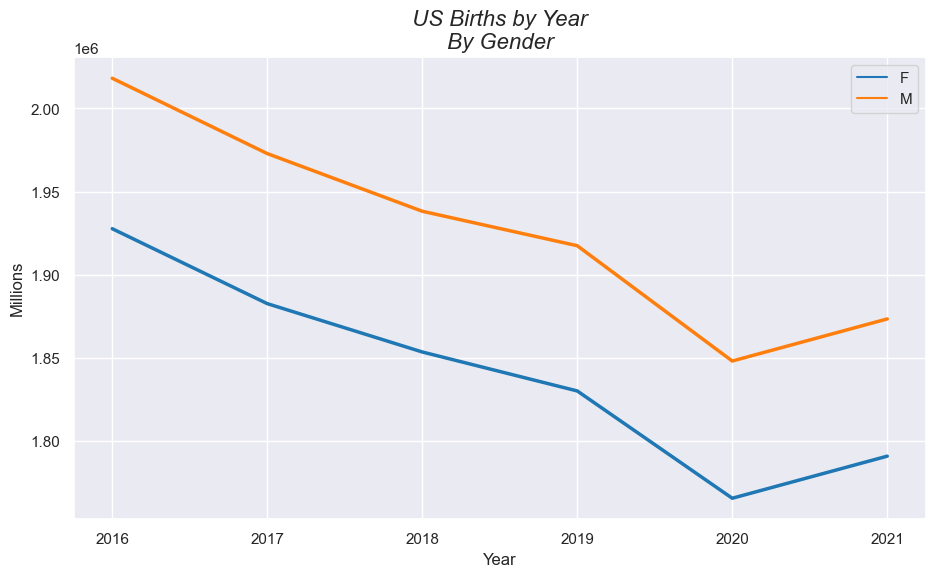

In [44]:
f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=new_gender_cleaned, x='Year', y="Number of Births",hue='Gender', palette="tab10", linewidth=2.5)
ax.set_title("US Births by Year\nBy Gender", style= 'italic', fontsize=16)
ax.set_ylabel('Millions')
ax.legend().set_visible(True)

In [45]:
z4 = birth_rates_df.drop(columns=["Gender", 'State', 'Average Birth Weight (g)', 'State Abbreviation']).reset_index()
z4_cleaned = z4.groupby(['Year', 'Education Level of Mother', 'Education Level Code']).agg({"Number of Births":'sum', 'Average Age of Mother (years)':'median'}).reset_index()
z4_cleaned= z4_cleaned.sort_values(by = ['Year', 'Education Level Code'], ascending = [True, True])

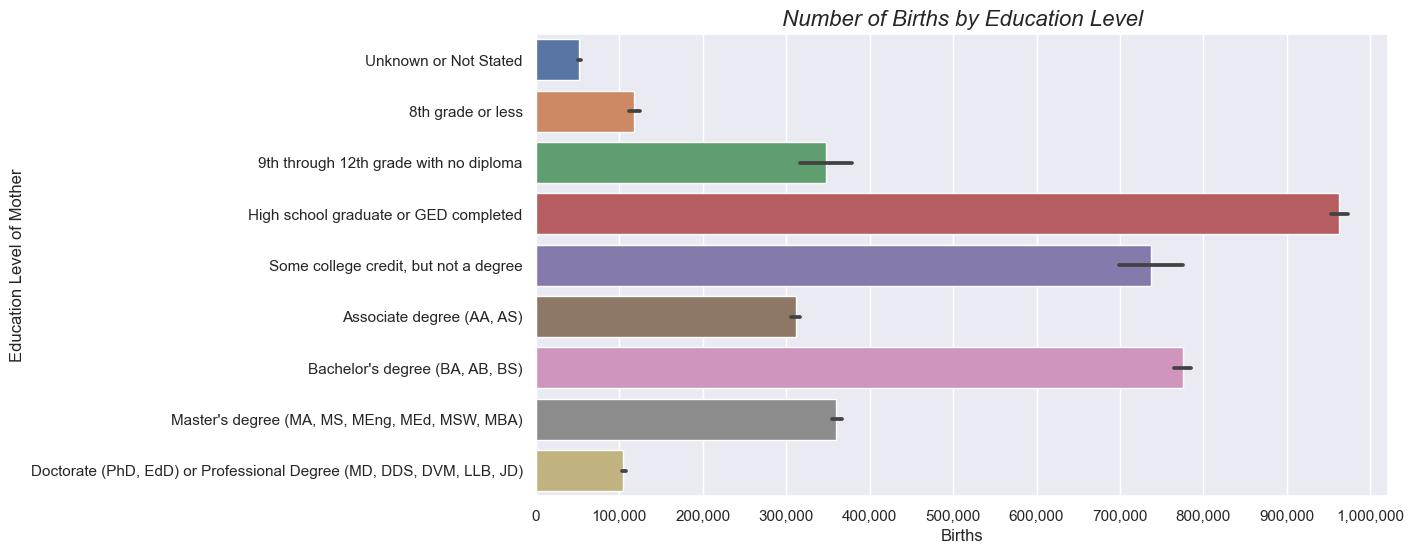

In [46]:
f, ax = plt.subplots(figsize=(11, 6))
sns.barplot(data=z4_cleaned, y="Education Level of Mother", x="Number of Births")


#sns.lineplot(data=new_gender_cleaned, x='Year', y="Number of Births",hue='Gender', palette="tab10", linewidth=2.5)
ax.set_title("Number of Births by Education Level", style= 'italic', fontsize=16)
ax.set_xlabel('Births')
#ax.legend().set_visible(True)
ax.xaxis.set_ticks(np.arange(0, 1100000, 100000))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_10154/29455288.py:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_xlim(18, 34.5, 2)


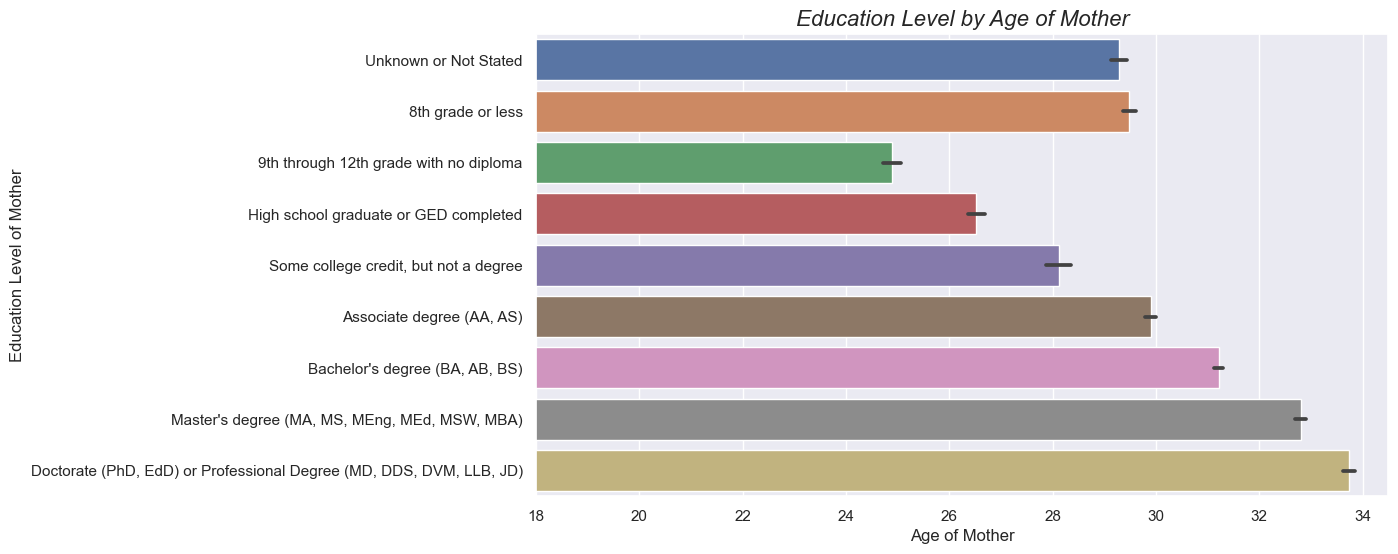

In [61]:
f, ax = plt.subplots(figsize=(11, 6))
sns.barplot(data=z4_cleaned, y="Education Level of Mother", x="Average Age of Mother (years)")


#sns.lineplot(data=new_gender_cleaned, x='Year', y="Number of Births",hue='Gender', palette="tab10", linewidth=2.5)
ax.set_title("Education Level by Age of Mother", style= 'italic', fontsize=16)
ax.set_xlabel('Age of Mother')
ax.set_xlim(18, 34.5, 2)
#ax.legend().set_visible(True)
#ax.xaxis.set_ticks(np.arange(0, 1100000, 100000))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_10154/1360919397.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


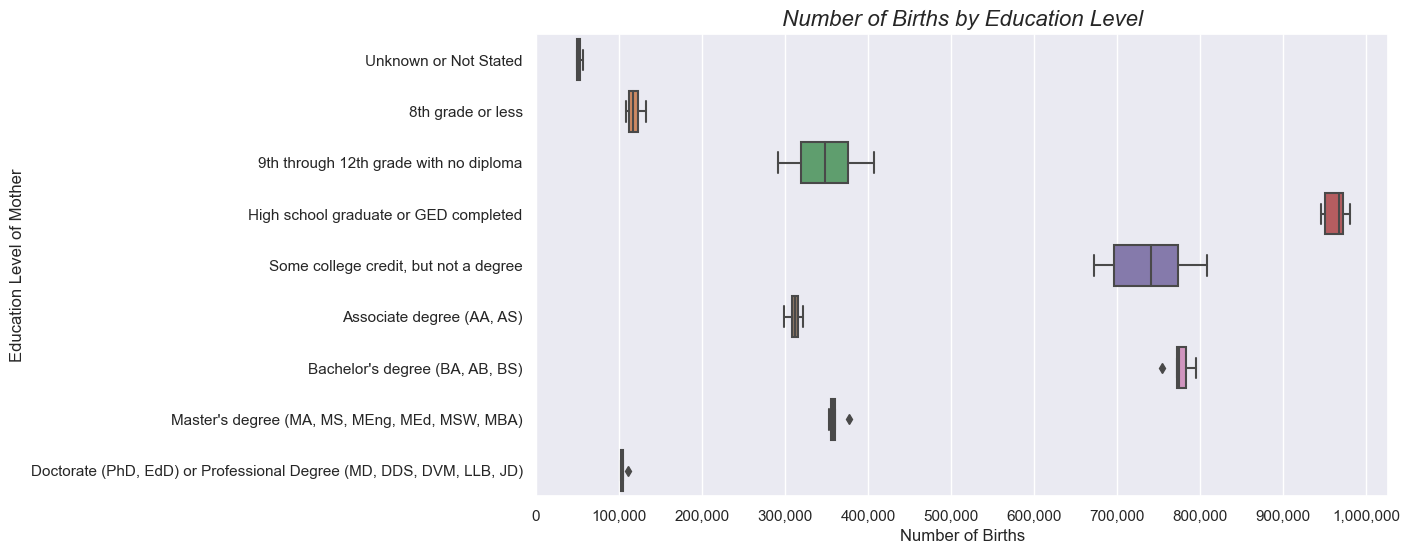

In [47]:
f, ax = plt.subplots(figsize=(11, 6))
sns.boxplot(data=z4_cleaned, y="Education Level of Mother", x="Number of Births")


#sns.lineplot(data=new_gender_cleaned, x='Year', y="Number of Births",hue='Gender', palette="tab10", linewidth=2.5)
ax.set_title("Number of Births by Education Level", style= 'italic', fontsize=16)
#ax.set_xlabel('Millions')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

ax.xaxis.set_ticks(np.arange(0, 1100000, 100000))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

In [48]:
weight = birth_rates_df.drop(columns=["Gender", 'State', 'State Abbreviation', 'Education Level of Mother', 'Education Level Code']).reset_index()
w_cleaned = weight.groupby(['Year', 'Average Age of Mother (years)']).agg({"Number of Births":'sum', 'Average Birth Weight (g)': 'mean'}).reset_index()
w_cleaned= w_cleaned.sort_values('Average Birth Weight (g)', ascending=True)
z= []
for grams in w_cleaned['Average Birth Weight (g)']:
    z.append(grams / 453.6)
z
w_cleaned['Average Birth Weight (lbs)'] = z
#w_cleaned['Average Age of Mother (years)'] = w_cleaned['Average Age of Mother (years)'].round()

,Year,Average Age of Mother (years),Number of Births,Average Birth Weight (g),Average Birth Weight (lbs)
462,2020,23.6,1731,2980.60,6.570988
118,2017,23.5,2028,2997.10,6.607363
347,2019,23.7,1011,3032.80,6.686067
583,2021,24.3,5095,3036.50,6.694224
623,2021,28.3,3343,3037.22,6.695811
...,...,...,...,...,...
345,2018,35.3,542,3394.10,7.482584
116,2016,34.9,553,3402.10,7.500220
198,2017,31.5,12399,3404.15,7.504740
331,2018,33.5,2193,3412.25,7.522597


/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_10154/851475716.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=w_cleaned, x='Average Age of Mother (years)', y="Average Birth Weight (lbs)", palette="tab10", linewidth=2.5)


<Axes: xlabel='Average Age of Mother (years)', ylabel='Average Birth Weight (lbs)'>

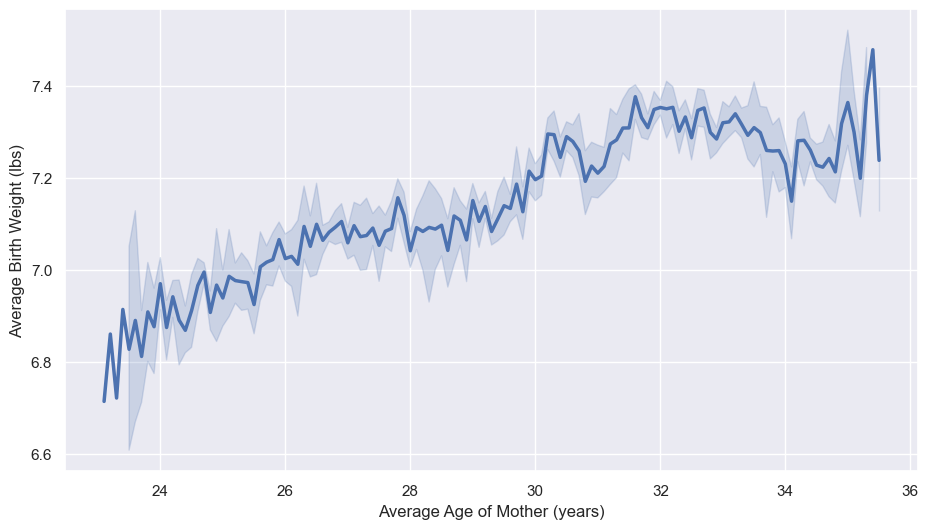

In [49]:
f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=w_cleaned, x='Average Age of Mother (years)', y="Average Birth Weight (lbs)", palette="tab10", linewidth=2.5)
##ax.set_title("US Births by Year\nBy Gender", style= 'italic', fontsize=16)
#ax.set_ylabel('Millions')
#ax.legend().set_visible(True)

#hue='Average Age of Mother (years)'

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_10154/1805190773.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=w_cleaned, x='Year', y="Average Birth Weight (lbs)", palette="tab10", linewidth=2.5)


<Axes: xlabel='Year', ylabel='Average Birth Weight (lbs)'>

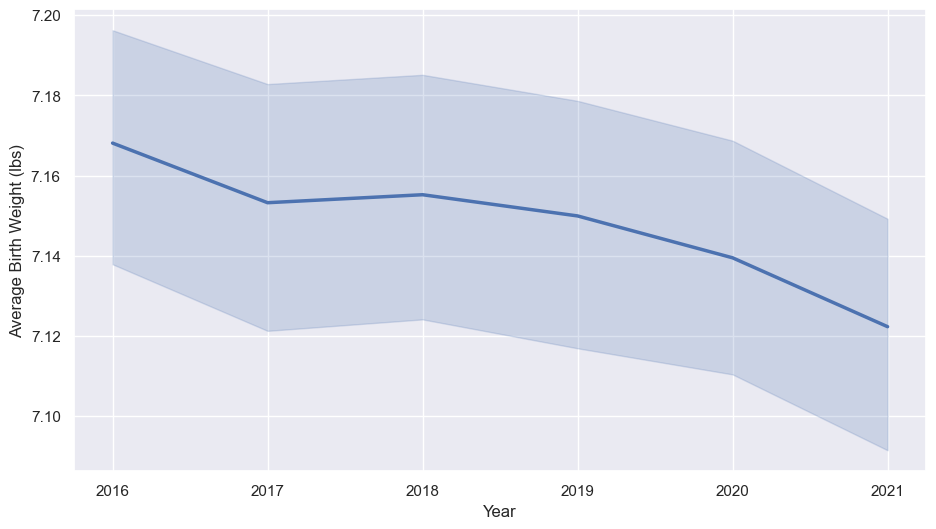

In [50]:
f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=w_cleaned, x='Year', y="Average Birth Weight (lbs)", palette="tab10", linewidth=2.5)

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_10154/591607240.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=new_df, x='Year', y="Average Birth Weight", palette="tab10", linewidth=2.5)


<Axes: xlabel='Year', ylabel='Average Birth Weight'>

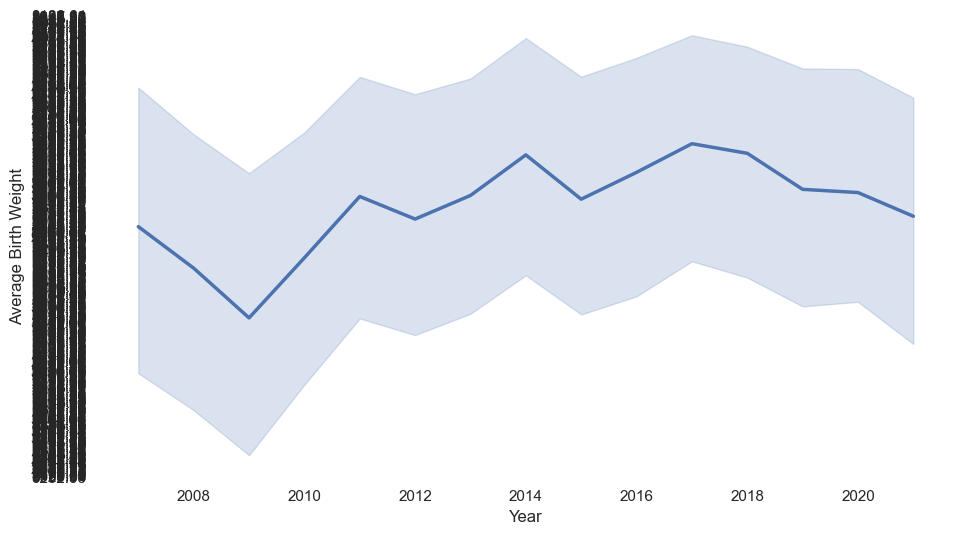

In [51]:
f, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=new_df, x='Year', y="Average Birth Weight", palette="tab10", linewidth=2.5)

In [52]:
w_cleaned['Average Age of Mother (years)'] = w_cleaned['Average Age of Mother (years)'].round()
w_cleaned['Average Birth Weight (lbs)'] = w_cleaned['Average Birth Weight (lbs)'].round(2)
w_cleaned = w_cleaned.groupby(['Year', 
                               'Average Age of Mother (years)']
                               ).agg({"Number of Births":'sum',
                                'Average Birth Weight (g)': 'mean',
                                'Average Birth Weight (lbs)': 'mean'}).reset_index()
w_cleaned['Average Age of Mother (years)'] = w_cleaned['Average Age of Mother (years)'].astype(int)
w_cleaned


,Year,Average Age of Mother (years),Number of Births,Average Birth Weight (g),Average Birth Weight (lbs)
0,2016,23,7816,3098.677778,6.830000
1,2016,24,129247,3162.538939,6.970909
2,2016,25,293533,3168.621799,6.985556
3,2016,26,530254,3206.548351,7.067273
4,2016,27,656681,3238.235174,7.138889
...,...,...,...,...,...
73,2021,32,355569,3308.187496,7.294545
74,2021,33,358463,3306.223908,7.288889
75,2021,34,180176,3286.827732,7.244545
76,2021,35,39774,3286.963095,7.245714


/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_10154/787474189.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


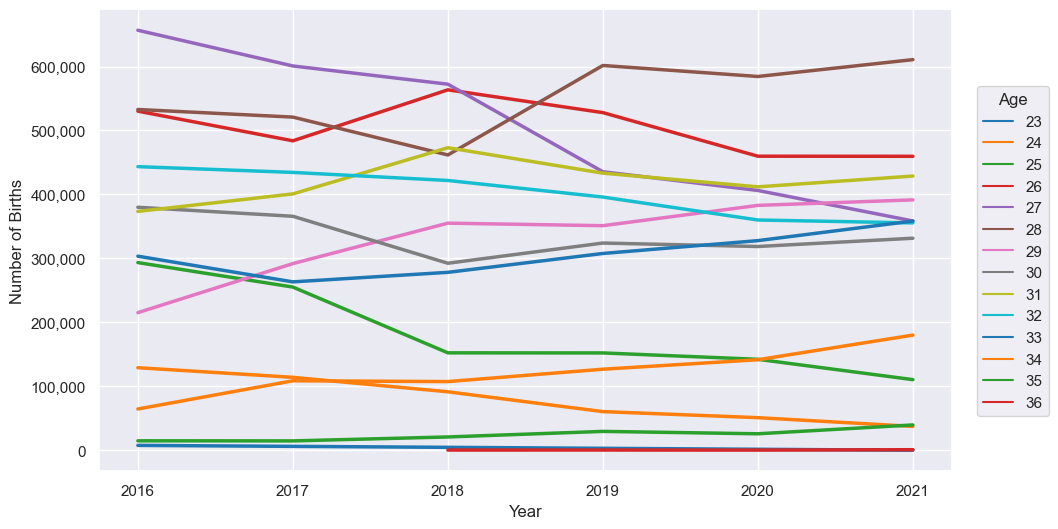

In [54]:
sns.set_theme()

f, ax = plt.subplots()
sns.lineplot(data=w_cleaned,x='Year', y='Number of Births', hue='Average Age of Mother (years)', palette="tab10" , linewidth=2.5)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
f.set_size_inches(11, 6)
pos = ax.get_position()
ax.legend(loc='upper right', bbox_to_anchor=(1.123, .85), title='Age');

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_90824/179375734.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);


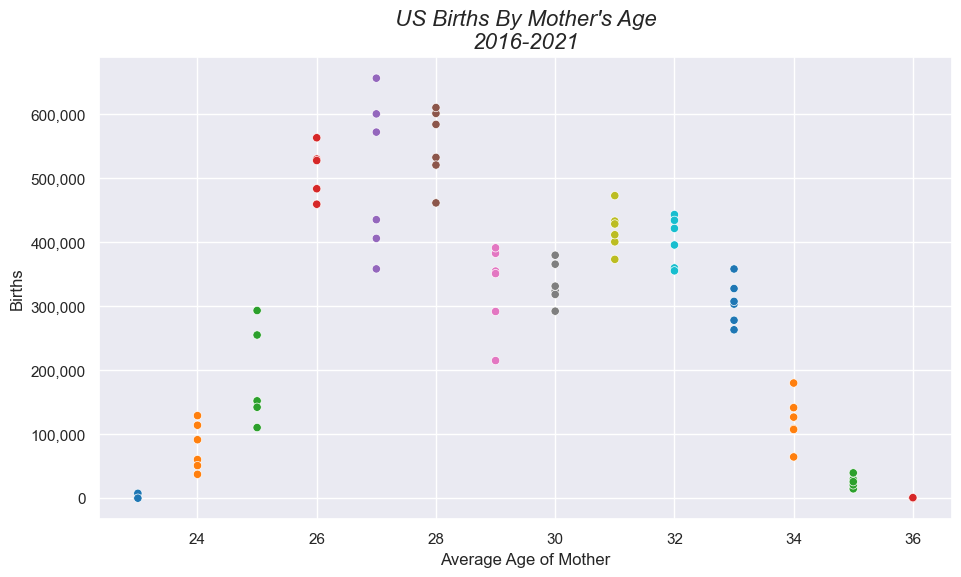

In [131]:
f, ax = plt.subplots(figsize = (11, 6))
sns.scatterplot(data=w_cleaned, y='Number of Births', x='Average Age of Mother (years)', hue='Average Age of Mother (years)', palette="tab10")
ax.legend().set_visible(False)
ax.set_title("US Births By Mother's Age\n2016-2021", style= 'italic', fontsize=16)
ax.set_xlabel('Average Age of Mother')
ax.set_ylabel('Births')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


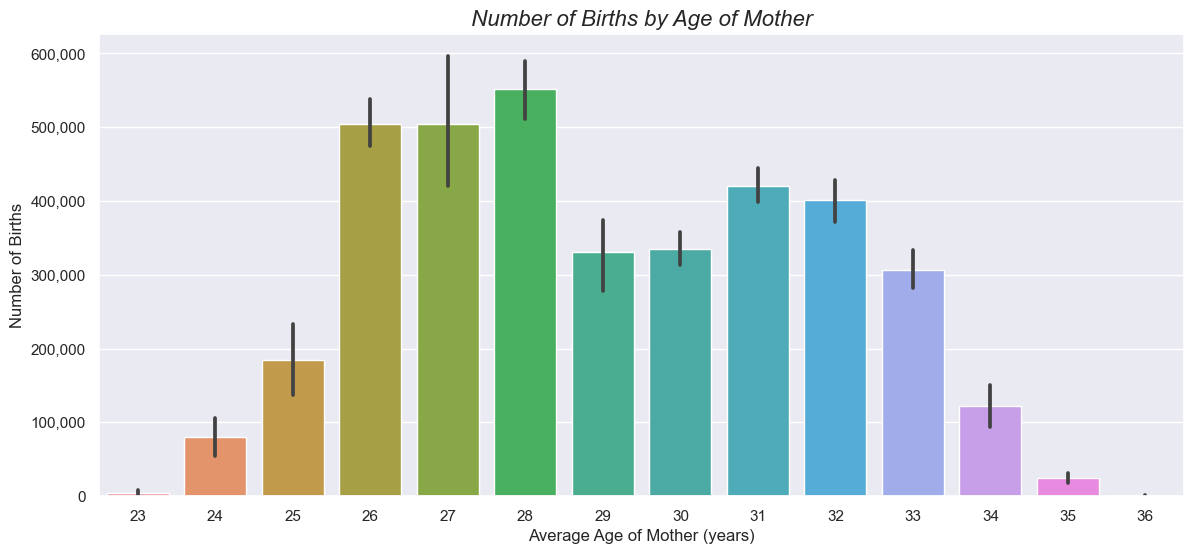

In [146]:
f, ax = plt.subplots(figsize=(14, 6))
sns.barplot(w_cleaned, y='Number of Births', x='Average Age of Mother (years)')#, hue='Average Age of Mother (years)', palette="tab10")


#sns.lineplot(data=new_gender_cleaned, x='Year', y="Number of Births",hue='Gender', palette="tab10", linewidth=2.5)
ax.set_title("Number of Births by Age of Mother", style= 'italic', fontsize=16)
#ax.set_xlabel('Births')
#ax.legend().set_visible(True)
#ax.xaxis.set_ticks(np.arange(0, 1100000, 100000))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.legend().set_visible(False)

In [117]:
w_cleaned['Average Age of Mother (years)'] = w_cleaned['Average Age of Mother (years)'].astype(int)
w_cleaned


,Year,Average Age of Mother (years),Number of Births,Average Birth Weight (g),Average Birth Weight (lbs)
0,2016,23,7816,3098.677778,6.83
1,2016,24,129247,3162.538939,6.97
2,2016,25,293533,3168.621799,6.99
3,2016,26,530254,3206.548351,7.07
4,2016,27,656681,3238.235174,7.14
...,...,...,...,...,...
73,2021,32,355569,3308.187496,7.29
74,2021,33,358463,3306.223908,7.29
75,2021,34,180176,3286.827732,7.24
76,2021,35,39774,3286.963095,7.25


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_90824/3853108384.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


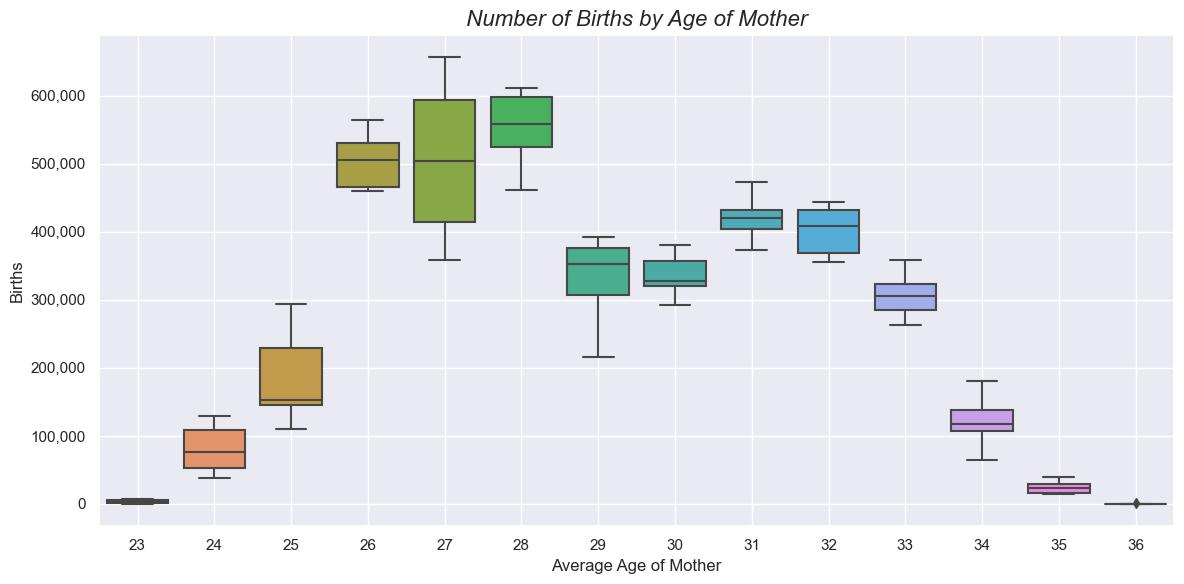

In [149]:
f, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(data=w_cleaned, y='Number of Births', x='Average Age of Mother (years)')#, hue='Average Age of Mother (years)', palette="tab10")
ax.legend().set_visible(False)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
ax.set_title("Number of Births by Age of Mother", style= 'italic', fontsize=16)
#current_values2 = plt.gca().get_xticks()
#plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values2])
#start, end = ax.set_xlim(20, 40)
#ax.set_xlim(20., 40.)
#ax.xaxis.set_ticks(np.arange(start, 40, 2))
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.set_xlabel("Average Age of Mother")
ax.set_ylabel('Births')
f.tight_layout()
ax.grid(visible=True);